In [9]:
#Module import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import feather
import seaborn as sns

%matplotlib inline

In [2]:
df = feather.read_dataframe("uncb_data_2003_2016.feather")
df.shape

(205, 18)

In [3]:
#df.sort_values(by='3PM', ascending=False).head()
df.loc[df['3PA'] >  100, ['YEAR','PLAYER','GP','3PA']]
tot_df = df.groupby('YEAR').sum()
tot_df = tot_df.drop(['GP'], axis=1)

def games_played(year):
    return df.loc[df['YEAR'] == year, 'GP'].max()

tot_gp = [games_played(year) for year in range(2003,2016)]
          
tot_df['GP'] = tot_gp
tot_df

tot_df['PPG'] = tot_df['PTS']/tot_df['GP']
tot_df.sort_values(by='PPG', ascending=False)

,MIN,FGM,FGA,FTM,FTA,3PM,3PA,PTS,OFFR,DEFR,REB,AST,TO,STL,BLK,GP,PPG
YEAR,,,,,,,,,,,,,,,,,
2009,7625,1205,2509,739,983,264,682,3413,491,989,1480,685,471,325,196,38,89.815789
2008,7900,1250,2564,738,975,216,580,3454,537,1026,1563,656,557,318,174,39,88.564103
2005,7400,1128,2260,724,998,277,687,3257,448,944,1392,706,589,362,142,37,88.027027
2007,7662,1188,2382,669,940,215,601,3260,468,978,1446,696,521,309,173,38,85.789474
2004,6125,877,1913,515,749,195,555,2464,407,684,1091,540,459,285,120,30,82.133333
2012,7625,1134,2473,629,922,194,579,3091,520,1072,1592,659,451,259,221,38,81.342105
2006,6200,863,1809,519,733,215,573,2460,375,748,1123,552,509,242,127,31,79.354839
2015,7650,1099,2309,571,814,184,514,2953,447,958,1405,661,468,251,160,38,77.710526
2011,7424,1044,2318,590,878,190,580,2868,464,998,1462,573,491,232,204,37,77.513514


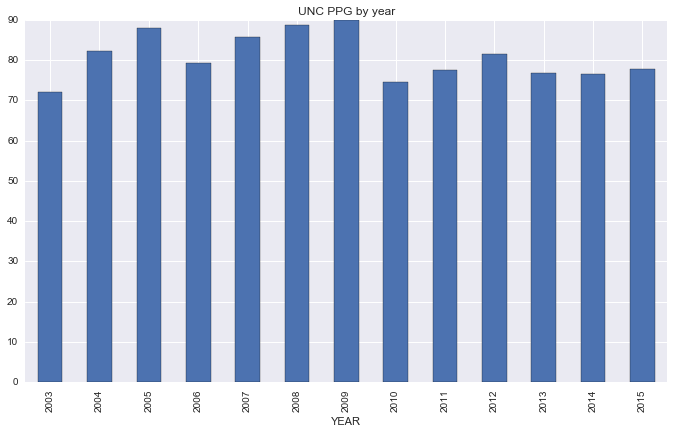

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

#sns.set_style("darkgrid")
tot_df['PPG'].plot.bar()
plt.title("UNC PPG by year")
sns.despine()

In [11]:
(df.groupby(['PLAYER']).sum()
.drop('YEAR', axis=1)
.query('PTS > 1000 & REB > 500')
.assign(FT_pct = lambda x: round(x.FTM/x.FTA*100,2))
.sort_values(by='FT_pct', ascending=False)
.head(10)
)

,GP,MIN,FGM,FGA,FTM,FTA,3PM,3PA,PTS,OFFR,DEFR,REB,AST,TO,STL,BLK,FT_pct
PLAYER,,,,,,,,,,,,,,,,,
DANNY GREEN,145,2889,491,1079,202,239,184,491,1368,204,386,590,256,209,160,154,84.52
TYLER HANSBROUGH,142,4394,939,1752,982,1241,12,38,2872,482,737,1219,154,297,180,66,79.13
TYLER ZELLER,117,2698,547,1010,407,524,0,2,1501,316,472,788,69,165,78,130,77.67
SEAN MAY,77,2139,442,862,329,459,0,11,1213,267,504,771,113,184,100,95,71.68
DEON THOMPSON,152,3247,579,1171,256,390,0,2,1414,290,453,743,114,202,120,144,65.64
BRICE JOHNSON,108,1981,447,807,144,223,0,0,1038,199,420,619,75,117,68,104,64.57
JAMES MICHAEL MCADOO,108,2693,467,1044,298,524,0,9,1232,232,408,640,111,173,132,58,56.87
JOHN HENSON,109,2594,475,955,169,350,5,24,1124,269,617,886,108,166,69,277,48.29
